In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import random 
import seaborn as sns
import matplotlib.pyplot as plt

# **0. Definición de Funciones EDA**

## 0.1 Función de Distribuciones de las categórias principales

In [519]:
def distributions_main_categories(categorical_columns, df):
    distribucion_summary = {}
    colors = ['skyblue', 'lightcoral', 'lightseagreen', 'plum', 'lightgreen', 'peachpuff', 'wheat','skyblue' ,'lavender', 'thistle', 'powderblue'] #Definir una lista de colores. 
    for column in categorical_columns: #Recorrer cada una de las columnas categóricas.
        print(f"\033[1mDistribución de la variable: {column}\033[0m") #Imprimir el nombre de la columna categórica que se esta procesando.
        value_counts = df[column].value_counts() #Obtener la cantidad de veces que aparece cada valor único en la columna que se esta procesando.
        distribucion_summary[column] = []  # Inicializar la lista vacía para esa columna.
        for value, count in value_counts.items(): #iterar sobre cada par obtenido.
            percentage = (count / df.shape[0]) * 100 #Calcular el porcentaje del valor procesado, respecto al total de filas del dataframe.
            print(f"Valor: {value} - Numero de incidencias: {count} - Porcentaje: {round(percentage, 2)}%") #Imprimir la información, redondeando el porcentaje a 2 cifras.
            distribucion_summary[column].append( {
                "valor": value,
                "incidencias":  count ,
                "porcentaje": round(percentage, 2)
            })
        plt.figure(figsize=(8, 5)) #Crea una nueva figura con un tamaño específico para el gráfico.
        value_counts.plot(kind='bar', color=random.choice(colors)) #Genera un gráfico de barras de la distribución de valores de la columna que se esta procesando.
        plt.xlabel('Valores') #Añadir la etiqueta del eje X: "Valores".
        plt.ylabel('Número de incidencias') #Añadir la etiqueta del eje Y: "Número de incidencias".
        plt.title(f'Distribución de la variable: {column}') #Añadir el título del gráfico, indicando qué columna está graficando.
        plt.show() #Mostrar el gráfico generado.
    return distribucion_summary

## 0.2 Función de correlación entre variables

In [233]:
def correlation_variables(df):
    correlation = df.corr() #Calcula la matriz de correlación de todas las columnas numéricas del DataFrame.
    plt.figure(figsize=(10, 8)) #Crea una nueva figura con un tamaño específico para el gráfico.
    sns.heatmap(correlation, annot=True, cmap='RdYlGn', center=0) #Dibujar un mapa de calor (heatmap) usando seaborn con los valores de la matriz de correlación.
    plt.title('Matriz de Correlación') #Agregar un título al gráfico.
    plt.show() #Mostrar el gráfico generado.

## 0.3 Función Estadísticas descriptivas para las variables numéricas

In [234]:
def describe_numeric_columns(numeric_columns,df):
    return df.loc[:,numeric_columns].describe() #Se selecciona todas las filas, pero solo las columnas numericas previamente listadas.

# **1. Selección de Dataset Original**

## Dataset: Heart Disease Dataset

El objetivo principal del conjunto de datos es **Predecir si un paciente tiene o no una enfermedad cardíaca**.

> **Link:** https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


In [344]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Dataset contiene variables categóricas y númericas.

| Columna         | Tipo        | Descripción                                                                 | Relevancia                                           |
|-----------------|-------------|-----------------------------------------------------------------------------|------------------------------------------------------|
| `age`           | Numérica    | Edad del paciente (en años)                                                 | mayor edad puede ser un factor de riesgo  |
| `sex`           | Categórica  | Sexo del paciente (`1` = hombre, `0` = mujer)                               | -                                          |
| `cp`            | Categórica  | Tipo de dolor torácico (0-3, donde 0 = típico anginoso, 3 = asintomático)   | mayor valor indica menor riesgo          |
| `trestbps`      | Numérica    | Presión arterial en reposo (mm Hg)                                          | mayor valor indica mayor riesgo           |
| `chol`          | Numérica    | Colesterol sérico en mg/dl                                                  | mayor valor indica mayor riesgo           |
| `fbs`           | Categórica  | Azúcar en sangre en ayunas > 120 mg/dl (`1`=sí, `0`=no)                      | presencia de diabetes aumenta el riesgo   |
| `restecg`       | Categórica  | Resultados del electrocardiograma en reposo (0 = normal, 1 = anormalidad en onda ST-T, 2 = hipertrofia ventricular izquierda)                                | Mayor valor indica mayor riesgo                                          |
| `thalach`       | Numérica    | Frecuencia cardíaca máxima alcanzada                                        | mayor frecuencia cardíaca puede indicar mejor condición |
| `exang`         | Categórica  | Angina inducida por ejercicio (`1`=sí, `0`=no)                               | presencia de angina aumenta el riesgo  |
| `oldpeak`       | Numérica    | Depresión del ST inducida por ejercicio en relación con el reposo          | mayor depresión indica mayor riesgo       |
| `slope`         | Categórica  | Pendiente del segmento ST durante el ejercicio (0 = normal, 1 = anormalidad en onda ST-T, 1 = anormalidad en onda ST-T)                             | Mayor valor indica mayor riesgo                                          |
| `ca`            | Numérica    | Número de vasos principales coloreados por fluoroscopia (0-3)               | mayor número indica mayor severidad     |
| `thal`          | Categórica  | Resultado de la prueba de talio (`3` = normal, `6` = defecto fijo, `7` = reversible) | Negativa (valores diferentes de 3 indican anormalidades) |
| `target`        | Categórica  | Presencia de enfermedad cardíaca (`1`=sí, `0`=no)                            | -                                         |


### Variables Categóricas Preeliminares

In [345]:
# Columnas categóricas
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target','ca']

### Variables Númericas

In [346]:
# Columnas numéricas
numeric_columns = ['age','trestbps','chol','thalach','oldpeak']

## Visualizar los tipos de datos de las columnas del DataSet:

In [347]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

>Aunque todas las variables del DataSet reflejan un tipo de dato númerico, algunas de ellas son en realidad númericas discretas, por lo que las trabajaremos como categóricas.

##  Dataset con al menos 500 registros

In [348]:
print(f"Número de registros del DataSet: {df.shape[0]}")

Número de registros del DataSet: 1025


# **2. Análisis Exploratorio de Datos (EDA)**

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


> El DataFrame no posee valores nulos en en ninguna de sus filas.

## 2.1 Estadísticas descriptivas para las variables numéricas DataSet Original.

In [558]:
describe_original = describe_numeric_columns(numeric_columns, df)
describe_original

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


## 2.2 Distribuciones de las categorías principales DataSet Original.

Distribución de la variable: sex
Valor: 1 - Numero de incidencias: 713 - Porcentaje: 69.56%
Valor: 0 - Numero de incidencias: 312 - Porcentaje: 30.44%


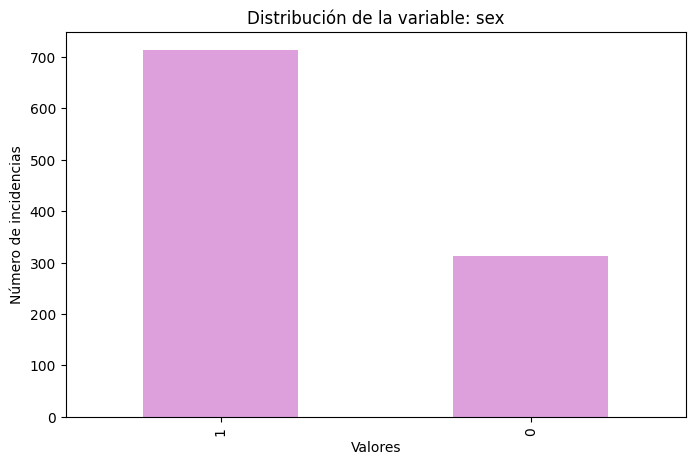

Distribución de la variable: cp
Valor: 0 - Numero de incidencias: 497 - Porcentaje: 48.49%
Valor: 2 - Numero de incidencias: 284 - Porcentaje: 27.71%
Valor: 1 - Numero de incidencias: 167 - Porcentaje: 16.29%
Valor: 3 - Numero de incidencias: 77 - Porcentaje: 7.51%


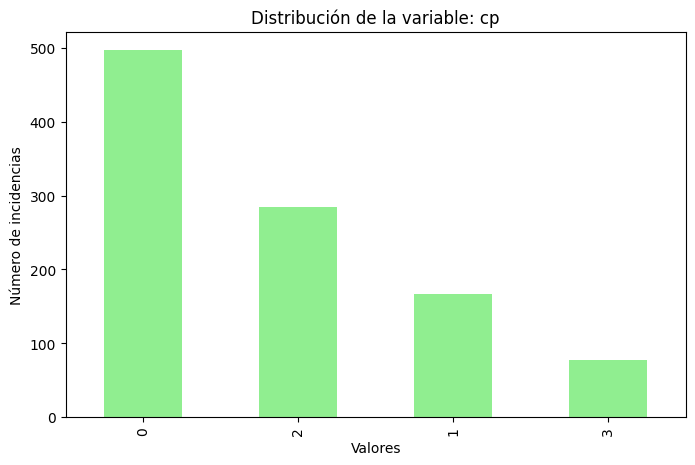

Distribución de la variable: restecg
Valor: 1 - Numero de incidencias: 513 - Porcentaje: 50.05%
Valor: 0 - Numero de incidencias: 497 - Porcentaje: 48.49%
Valor: 2 - Numero de incidencias: 15 - Porcentaje: 1.46%


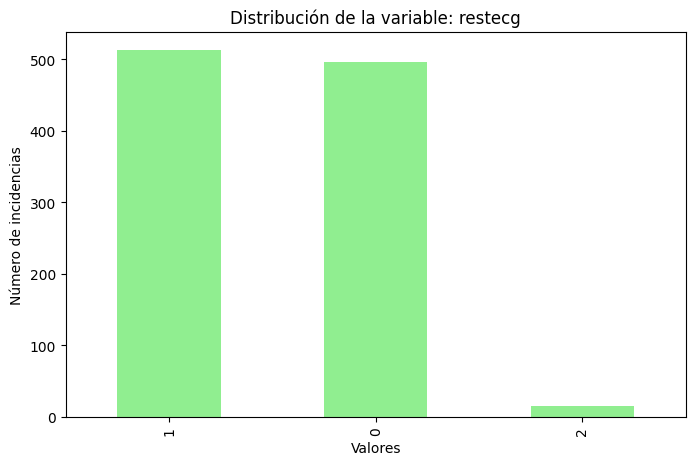

Distribución de la variable: exang
Valor: 0 - Numero de incidencias: 680 - Porcentaje: 66.34%
Valor: 1 - Numero de incidencias: 345 - Porcentaje: 33.66%


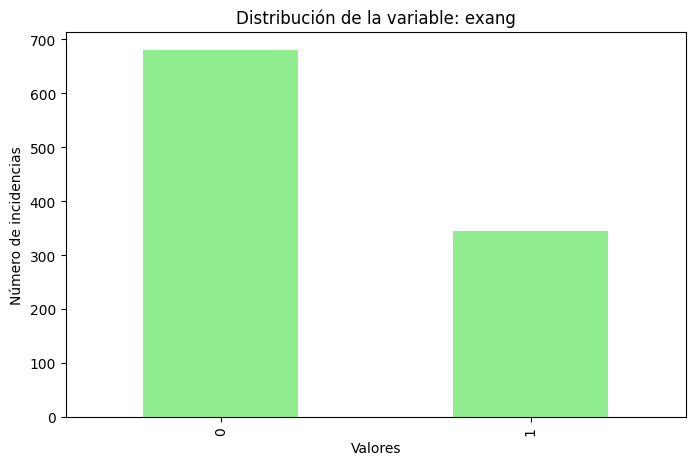

Distribución de la variable: slope
Valor: 1 - Numero de incidencias: 482 - Porcentaje: 47.02%
Valor: 2 - Numero de incidencias: 469 - Porcentaje: 45.76%
Valor: 0 - Numero de incidencias: 74 - Porcentaje: 7.22%


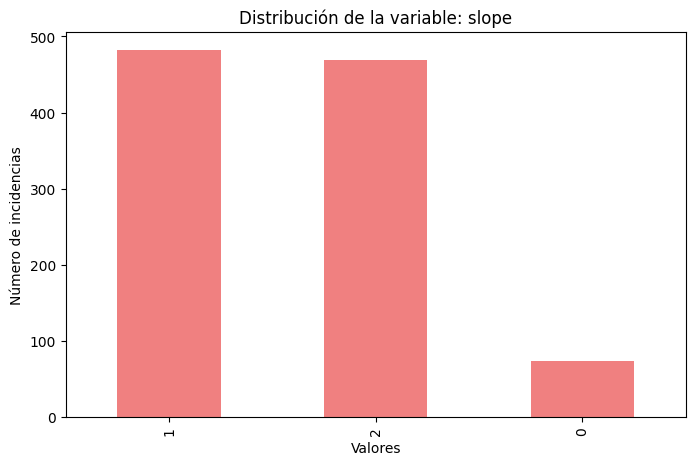

Distribución de la variable: thal
Valor: 2 - Numero de incidencias: 544 - Porcentaje: 53.07%
Valor: 3 - Numero de incidencias: 410 - Porcentaje: 40.0%
Valor: 1 - Numero de incidencias: 64 - Porcentaje: 6.24%
Valor: 0 - Numero de incidencias: 7 - Porcentaje: 0.68%


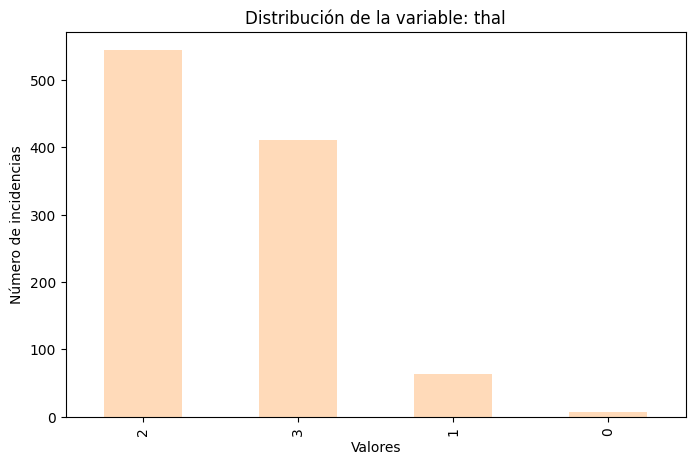

Distribución de la variable: target
Valor: 1 - Numero de incidencias: 526 - Porcentaje: 51.32%
Valor: 0 - Numero de incidencias: 499 - Porcentaje: 48.68%


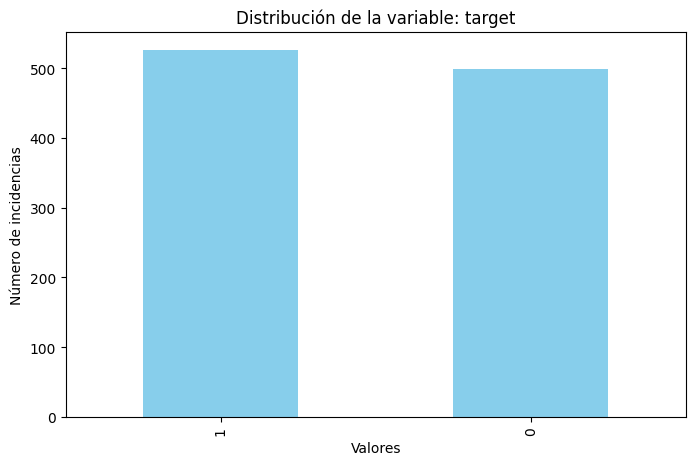

Distribución de la variable: ca
Valor: 0 - Numero de incidencias: 578 - Porcentaje: 56.39%
Valor: 1 - Numero de incidencias: 226 - Porcentaje: 22.05%
Valor: 2 - Numero de incidencias: 134 - Porcentaje: 13.07%
Valor: 3 - Numero de incidencias: 69 - Porcentaje: 6.73%
Valor: 4 - Numero de incidencias: 18 - Porcentaje: 1.76%


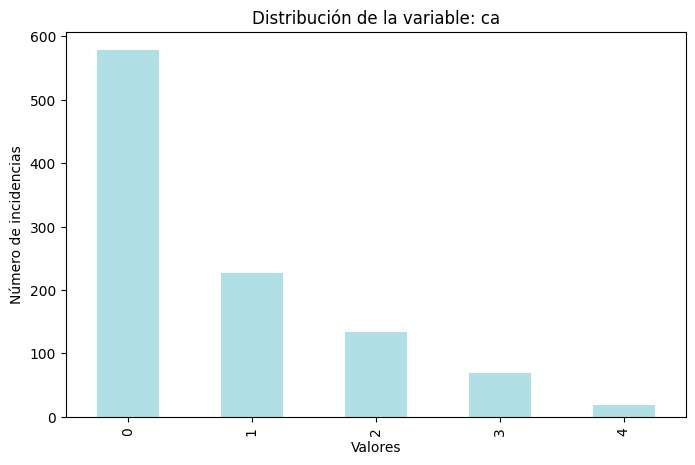

In [522]:
#LLamar a la función previamente creada
distributions_original = distributions_main_categories(categorical_columns, df)

## 2.3 Visualización de correlaciones entre variables DataSet Original.

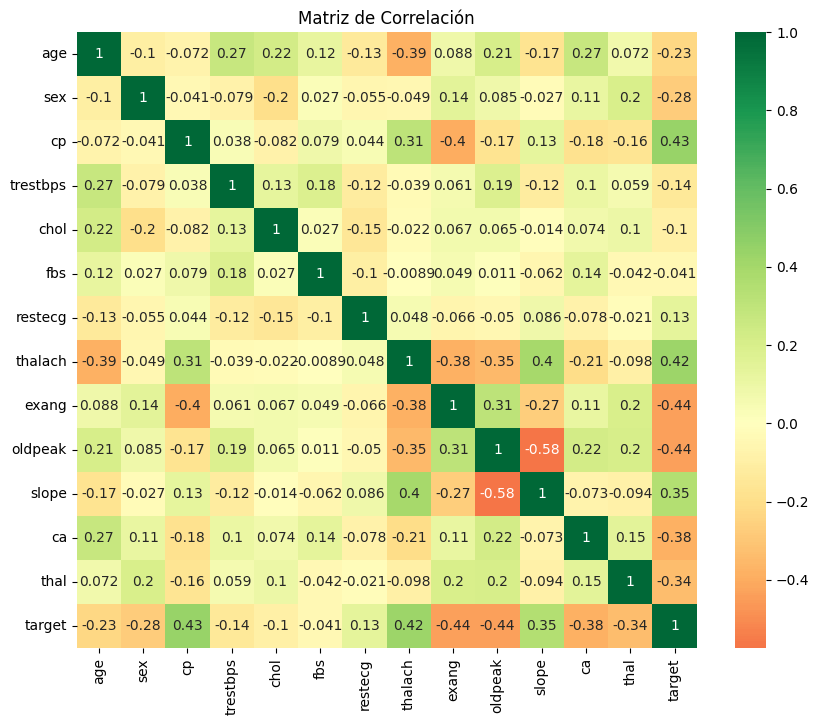

In [352]:
correlation_variables(df)

### **Conclusión del Análisis de Correlación**
Al comparar las correlaciones entre las variables mostradas en el gráfico, con lo esperado que fue descrito en la tabla mostrada al inicio, se observan resultados inesperados:<br>
❌**Correlación Target-Age**: Presenta una relación débil y negativa (-0.23), es decir que  la probabilidad que un paciente posea una enfermedad cardiaca disminuye a medida que aumentada de edad.<br>
❌**Correlación Target-Sex**: Presenta una relación débil y negativa (-0.28), es decir que la probabilidad que un paciente posea una enfermedad cardiaca disminuye, si el paciente es hombre.<br>
❌**Correlación Target-Cp**: Presenta una relación significativa y positiva (+43), es decir que la probabilidad que un paciente posea una enfermedad caridaca aumenta,si el paciente es asintomatico de dolor torácico.<br>
❌**Correlación Target-trestbps**: Presenta una relación débil y negativa (-0.14), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el paciente posee  una menor presión arterial en reposo.<br>
❌**Correlación Target-chol**: Presenta una relación débil y negativa (-0.1), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el valor del colesterol sérico disminuye.<br>
❌**Correlación Target-fbs**: Presenta una relación débil y negativa (-0.041), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si sus niveles en sangre disminuye. 
> Sin embargo, se obserba que la **correlación entre la variable fbs con nuestra variable target, es demasiada cercana a cero**, por lo que se decidió que no fuera parte de la simulación.<br>

✅**Correlación Target-restecg**: Presenta una relación débil y positiva(+0.13), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el resultado del electrocardiograma en reposo muestra hipertrofia ventricular izquierda.<br>
❌**Correlación Target-thalach**: Presenta una relación significativa y positiva (+42), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el valor de la frecuencia cardiaca maxima aumenta.<br>
❌**Correlación Target-exang**: Presenta una relación significativa y negativa (-0.44), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el valor del de la angina inducida por ejercicio disminuye.<br>
❌**Correlación Target-oldpeak**: Presenta una relación significativa y negativa (-0.44), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el valor del de la Depresión del ST inducida por ejercicio en relación con el reposo disminuye.<br>
✅**Correlación Target-slope**: Presenta una relación significativa y positiva (+35), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el valor del pendiente del segmento ST máximo durante el ejercicio aumenta.<br>
❌**Correlación Target-ca**: Presenta una relación significativa y negativa (-0.38), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el valor del Número de vasos principales coloreados por fluoroscopia disminuye.<br>
❌**Correlación Target-thal**: Presenta una relación significativa y negativa (-0.34), es decir que la probabilidad que un paciente posea una enfermedad cardiaca aumenta, si el valor delResultado de la prueba de talio disminuye.<br>

---

### **Conclusión del Análisis**

Se observa que el **84.6%** de la correlación entre las variables y nuestra variable objetivo (**target**) refleja resultados inesperados. Además, todas las correlaciones son considerablemente bajas, con la máxima correlación alcanzando un valor de **-0.58**.

---

### **Variables Ordenadas por Relevancia Esperada**

- `target`
- `trestbps`
- `chol`
- `oldpeak`
- `exang`
- `fbs`
- `restecg`
- `ca`
- `thalach`
- `cp`
- `age`
- `thal`
- `sex`
- `slope`

---

### **Variables Ordenadas por Nivel de Correlación**

- `exang (-0.44)`
- `oldpeak (-0.44)`
- `cp (+0.43)`
- `thalach (+0.42)`
- `ca (-0.38)`
- `slope (+0.35)`
- `thal (-0.34)`
- `sex (-0.28)`
- `age (-0.23)`
- `trestbps (-0.14)`
- `restecg (+0.13)`
- `chol (-0.1)`
- `fbs (-0.041)`


### Variables Categóricas

In [353]:
# Columnas categóricas
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal', 'target','ca']

# **3. Simulación del Dataset Expandido**

## 3.1 Calcular la frecuencia probabilística

In [461]:
probabilistic_frequency = df.groupby(categorical_columns).size().reset_index(name='probability')
probabilistic_frequency['probability'] = probabilistic_frequency['probability']/df.shape[0]
probabilistic_frequency['id']=probabilistic_frequency.index

In [462]:
probabilistic_frequency

,sex,cp,restecg,exang,slope,thal,target,ca,probability,id
0,0,0,0,0,0,2,0,2,0.003902,0
1,0,0,0,0,0,3,0,3,0.002927,1
2,0,0,0,0,1,2,1,0,0.011707,2
3,0,0,0,0,1,3,0,2,0.002927,3
4,0,0,0,0,1,3,0,3,0.007805,4
...,...,...,...,...,...,...,...,...,...,...
180,1,3,1,0,1,3,0,0,0.002927,180
181,1,3,1,0,1,3,1,0,0.002927,181
182,1,3,1,0,2,2,0,2,0.003902,182
183,1,3,1,1,1,3,0,0,0.003902,183


## 3.2 Encontrar los límites inferiores y superiores para los valores atipicos

In [463]:
trans = {}
columnsDf = []
for numerical_column in numeric_columns:
    trans[numerical_column]= [
            ('lower_bound',lambda x: x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25)))
            ,('upper_bound',lambda x: x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25)))
        ]
    #limpiar las columnas (aplanar los dos niveles de columnas que se tiene al generar el dataframe con el upeer y lower bound)
    columnsDf.append(f"{numerical_column}_lower_bound")
    columnsDf.append(f"{numerical_column}_upper_bound")
df_outlier_bounds = df.groupby(categorical_columns, as_index=False).agg(trans)

columnsDf = categorical_columns+columnsDf
df_outlier_bounds.columns = columnsDf

In [464]:
df_outlier_bounds

,sex,cp,restecg,exang,slope,thal,target,ca,age_lower_bound,age_upper_bound,trestbps_lower_bound,trestbps_upper_bound,chol_lower_bound,chol_upper_bound,thalach_lower_bound,thalach_upper_bound,oldpeak_lower_bound,oldpeak_upper_bound
0,0,0,0,0,0,2,0,2,62.000,62.000,140.0,140.0,268.000,268.000,160.00,160.00,3.6,3.6
1,0,0,0,0,0,3,0,3,62.000,62.000,160.0,160.0,164.000,164.000,145.00,145.00,6.2,6.2
2,0,0,0,0,1,2,1,0,37.125,72.125,55.0,179.0,204.125,353.125,85.25,183.25,-0.2,1.8
3,0,0,0,0,1,3,0,2,60.000,60.000,150.0,150.0,258.000,258.000,157.00,157.00,2.6,2.6
4,0,0,0,0,1,3,0,3,60.000,68.000,150.0,150.0,-48.000,680.000,54.00,214.00,-3.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1,3,1,0,1,3,0,0,45.000,45.000,110.0,110.0,264.000,264.000,132.00,132.00,1.2,1.2
181,1,3,1,0,1,3,1,0,52.000,52.000,152.0,152.0,298.000,298.000,178.00,178.00,1.2,1.2
182,1,3,1,0,2,2,0,2,59.000,59.000,134.0,134.0,204.000,204.000,162.00,162.00,0.8,0.8
183,1,3,1,1,1,3,0,0,38.000,38.000,120.0,120.0,231.000,231.000,182.00,182.00,3.8,3.8


## 3.3 Eliminar los valores atipicos fuera del rango

### Explicación de la eliminación de la variable age

Durante el proceso de eliminación de valores atípicos (a desarrollarse más adelante), se calculan los **límites inferior (lower bound)** y **superior (upper bound)** de cada variable numérica en el DataFrame, utilizando el **rango intercuartílico (IQR)**. Sin embargo, al aplicar este proceso, observamos que al dejar lel rango abierto de lower y upper bound, el dataframe se reducia al 41% y perdiamos mas del 75% de las agrupaciones de las variables categoricas, pues todas sus incidencias se eliminaban

Para evitar la pérdida excesiva de información y la eliminación de un porcentaje tan alto del DataFrame, decidimos **agregar la condición `=`** en las verificaciones de rango para permitir que los valores en el límite inferior o superior **también se incluyan en los datos**. Esto permitió **preservar una mayor cantidad de filas en el DataFrame**.

In [465]:
# Realizar un merge de el dataframe que contiene los limites inferiores y superiores para los valores atipicos con el dataframe original.
df_bound = df.merge(
    df_outlier_bounds,
    on=categorical_columns
    ,how='inner'
)
for c in numeric_columns:
    df_bound = df_bound.loc[
        (df_bound[c] >= df_bound[f"{c}_lower_bound"]) 
        &
        (df_bound[c] <= df_bound[f"{c}_upper_bound"])
        ,:
    ]
df_clean = df_bound.loc[:, categorical_columns+numeric_columns]
df_clean.reset_index(inplace=True)
print(f"El dataframe original se redujo al: {(df_clean.shape[0]/df.shape[0])*100}%")

El dataframe original se redujo al: 94.53658536585365%


for i in probabilistic_frequency.index:
    df_clean.loc[
        
           (
                (df_clean["sex"] == probabilistic_frequency.iloc[i]["sex"]) &
                (df_clean["cp"] == probabilistic_frequency.iloc[i]["cp"]) &
                (df_clean["restecg"] == probabilistic_frequency.iloc[i]["restecg"]) &
                (df_clean["exang"] == probabilistic_frequency.iloc[i]["exang"]) &
                (df_clean["slope"] == probabilistic_frequency.iloc[i]["slope"]) &
                (df_clean["thal"] == probabilistic_frequency.iloc[i]["thal"]) &
                (df_clean["target"] == probabilistic_frequency.iloc[i]["target"]) &
                (df_clean["ca"] == probabilistic_frequency.iloc[i]["ca"])
        )
    , 
        ["trestbps"]
    ].boxplot()
    plt.title(f"Agrupacion numero {i}")
    plt.show()

for i in probabilistic_frequency.index:
    df.loc[
        
           (
            (df["sex"] == probabilistic_frequency.iloc[i]["sex"]) &
            (df["cp"] == probabilistic_frequency.iloc[i]["cp"]) &
            (df["restecg"] == probabilistic_frequency.iloc[i]["restecg"]) &
            (df["exang"] == probabilistic_frequency.iloc[i]["exang"]) &
            (df["slope"] == probabilistic_frequency.iloc[i]["slope"]) &
            (df["thal"] == probabilistic_frequency.iloc[i]["thal"]) &
            (df["target"] == probabilistic_frequency.iloc[i]["target"]) &
            (df["ca"] == probabilistic_frequency.iloc[i]["ca"])
        )
    , 
        ["trestbps"]
    ].boxplot()
    plt.title(f"Agrupacion numero {i}")
    plt.show()

## 3.4 Encontrar el resumen estadistico 

In [466]:
summary = {}
sumColumns = []
for c in numeric_columns:
    summary[c] = ['min','max', 'mean', 'std']
    sumColumns.append(f"{c}_min")
    sumColumns.append(f"{c}_max")
    sumColumns.append(f"{c}_mean")
    sumColumns.append(f"{c}_std")
df_summary = df_clean.groupby(categorical_columns, as_index=False).agg(summary)
df_summary.columns = categorical_columns + sumColumns

## 3.5 Generar las muestras aleatorias de las variables categoricas.

In [483]:
#id simulados
simulated_outcomes = np.random.choice(probabilistic_frequency.index, size=100000, p=probabilistic_frequency['probability'].values)

In [484]:
def trunc_vector(min_val, max_val, media, desv_std, size):
    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=size)
    return muestras

In [491]:
df_simulated_temp = pd.DataFrame()
constantes = 0
for index in range(df_summary.shape[0]):
    num_values = len(simulated_outcomes[simulated_outcomes == index])
    simuled_values = {
        "id": simulated_outcomes[simulated_outcomes == index]
    }
    for c in numeric_columns:
        min_val = df_summary.iloc[index][f"{c}_min"].item()
        max_val = df_summary.iloc[index][f"{c}_max"].item()
        media = df_summary.iloc[index][f"{c}_mean"].item()
        size=num_values
        desv_std = df_summary.iloc[index][f"{c}_std"].item() 
        if desv_std == 0:
            simuled_values[c] = np.full(size, media) # Todos los valores iguales a la media
            constantes = constantes + size
        else:
            desv_std = df_summary.iloc[index][f"{c}_std"].item()
            simuled_values[c] = trunc_vector(min_val, max_val, media, desv_std, size)
    temp = pd.DataFrame(simuled_values)
    df_simulated_temp = pd.concat([df_simulated_temp, temp])

In [492]:
df_simulated = df_simulated_temp.merge(
    probabilistic_frequency,
    on="id"
    ,how='inner'
)

In [493]:
df_simulated = df_simulated.loc[ :  , categorical_columns+numeric_columns]

In [494]:
df_simulated

,sex,cp,restecg,exang,slope,thal,target,ca,age,trestbps,chol,thalach,oldpeak
0,0,0,0,0,0,2,0,2,62.0,140.0,268.0,160.0,3.6
1,0,0,0,0,0,2,0,2,62.0,140.0,268.0,160.0,3.6
2,0,0,0,0,0,2,0,2,62.0,140.0,268.0,160.0,3.6
3,0,0,0,0,0,2,0,2,62.0,140.0,268.0,160.0,3.6
4,0,0,0,0,0,2,0,2,62.0,140.0,268.0,160.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,3,1,1,2,3,1,0,40.0,140.0,199.0,178.0,1.4
99996,1,3,1,1,2,3,1,0,40.0,140.0,199.0,178.0,1.4
99997,1,3,1,1,2,3,1,0,40.0,140.0,199.0,178.0,1.4
99998,1,3,1,1,2,3,1,0,40.0,140.0,199.0,178.0,1.4


# **4. Análisis Comparativo (EDA del Dataset Expandido)**

## 4.1 Estadísticas descriptivas para las variables numéricas DataSet Simulado

In [546]:
describe_expandido = describe_numeric_columns(numeric_columns, df_simulated)
describe_expandido

,age,trestbps,chol,thalach,oldpeak
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,54.268822,131.248855,245.839450,148.582401,1.047628
std,8.293718,15.891741,45.235056,21.906764,1.087209
min,29.029679,94.000000,126.103821,71.000000,0.000000
25%,48.000000,120.000000,213.951924,132.000000,0.082913
50%,55.078549,129.890127,239.266996,152.000000,0.800000
75%,60.000000,140.000000,273.000000,165.000000,1.787555
max,77.000000,200.000000,564.000000,201.964677,6.200000


## 4.2 Distribuciones de las categorías principales DataSet Original.

Distribución de la variable: sex
Valor: 1 - Numero de incidencias: 69665 - Porcentaje: 69.66%
Valor: 0 - Numero de incidencias: 30335 - Porcentaje: 30.34%


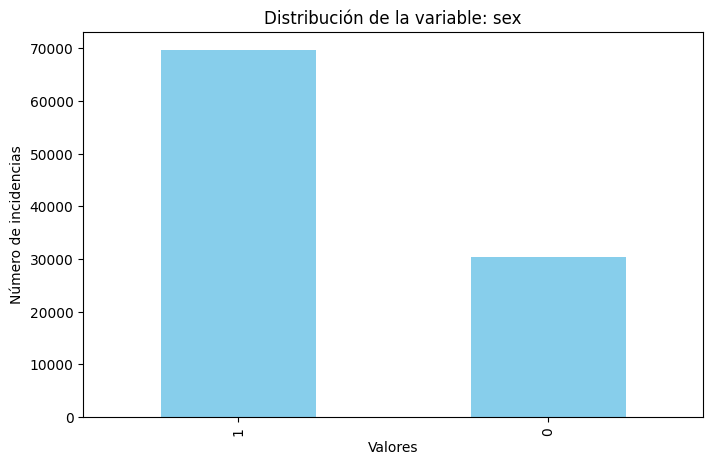

Distribución de la variable: cp
Valor: 0 - Numero de incidencias: 48750 - Porcentaje: 48.75%
Valor: 2 - Numero de incidencias: 27437 - Porcentaje: 27.44%
Valor: 1 - Numero de incidencias: 16346 - Porcentaje: 16.35%
Valor: 3 - Numero de incidencias: 7467 - Porcentaje: 7.47%


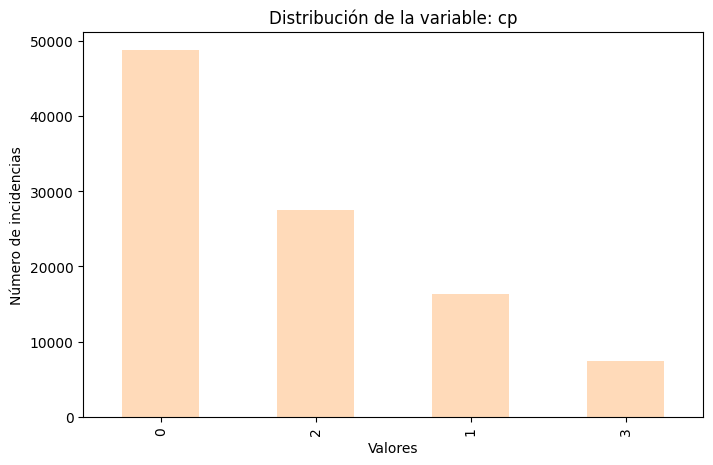

Distribución de la variable: restecg
Valor: 1 - Numero de incidencias: 50070 - Porcentaje: 50.07%
Valor: 0 - Numero de incidencias: 48488 - Porcentaje: 48.49%
Valor: 2 - Numero de incidencias: 1442 - Porcentaje: 1.44%


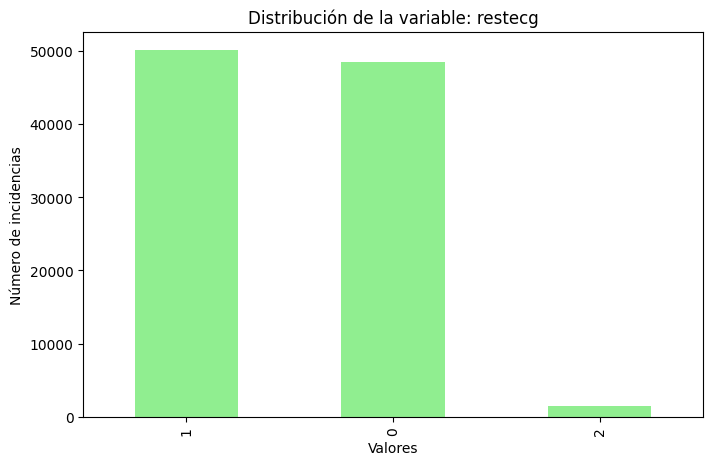

Distribución de la variable: exang
Valor: 0 - Numero de incidencias: 66261 - Porcentaje: 66.26%
Valor: 1 - Numero de incidencias: 33739 - Porcentaje: 33.74%


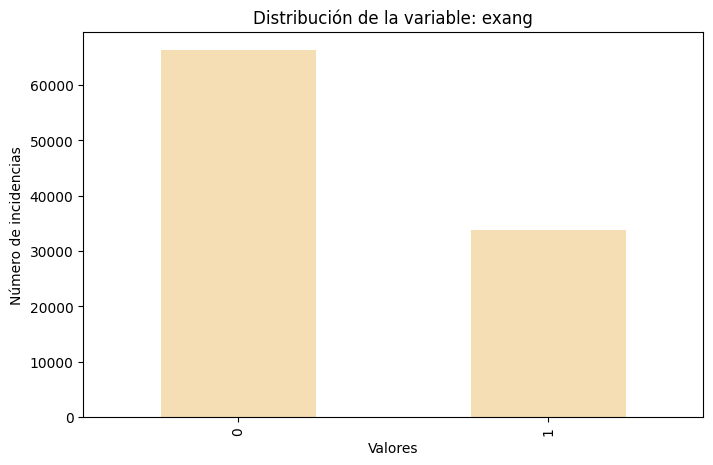

Distribución de la variable: slope
Valor: 1 - Numero de incidencias: 46932 - Porcentaje: 46.93%
Valor: 2 - Numero de incidencias: 45892 - Porcentaje: 45.89%
Valor: 0 - Numero de incidencias: 7176 - Porcentaje: 7.18%


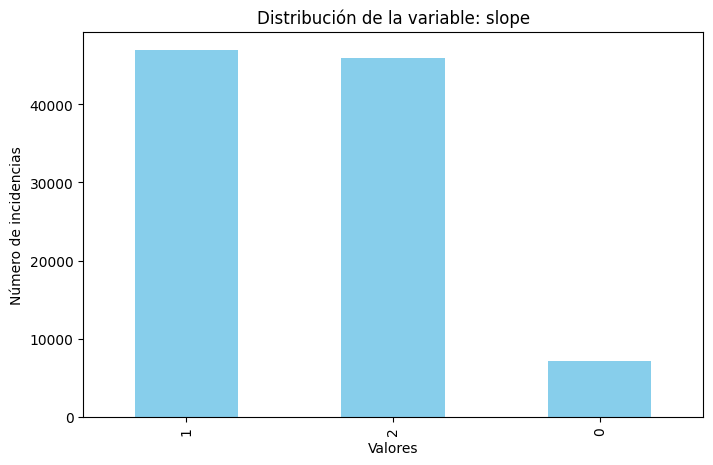

Distribución de la variable: thal
Valor: 2 - Numero de incidencias: 53127 - Porcentaje: 53.13%
Valor: 3 - Numero de incidencias: 40050 - Porcentaje: 40.05%
Valor: 1 - Numero de incidencias: 6144 - Porcentaje: 6.14%
Valor: 0 - Numero de incidencias: 679 - Porcentaje: 0.68%


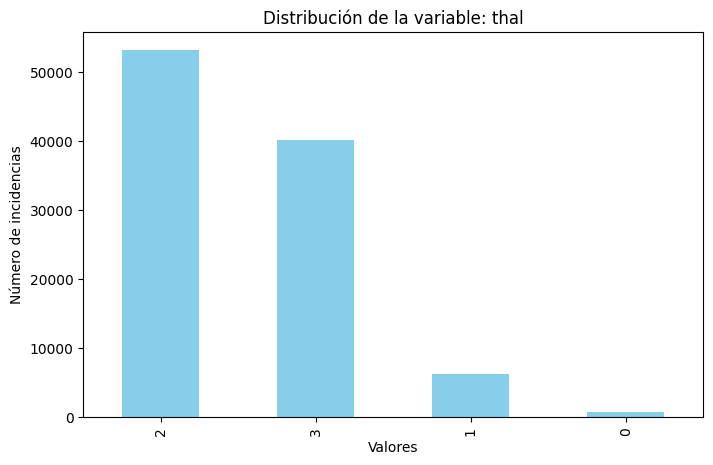

Distribución de la variable: target
Valor: 1 - Numero de incidencias: 51198 - Porcentaje: 51.2%
Valor: 0 - Numero de incidencias: 48802 - Porcentaje: 48.8%


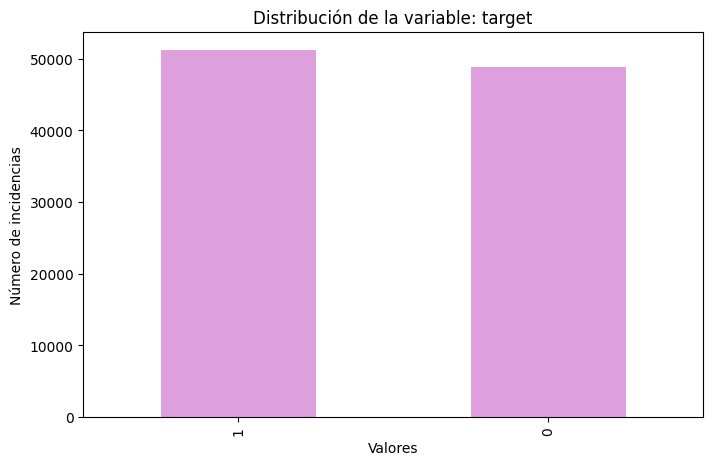

Distribución de la variable: ca
Valor: 0 - Numero de incidencias: 56121 - Porcentaje: 56.12%
Valor: 1 - Numero de incidencias: 22087 - Porcentaje: 22.09%
Valor: 2 - Numero de incidencias: 13225 - Porcentaje: 13.23%
Valor: 3 - Numero de incidencias: 6779 - Porcentaje: 6.78%
Valor: 4 - Numero de incidencias: 1788 - Porcentaje: 1.79%


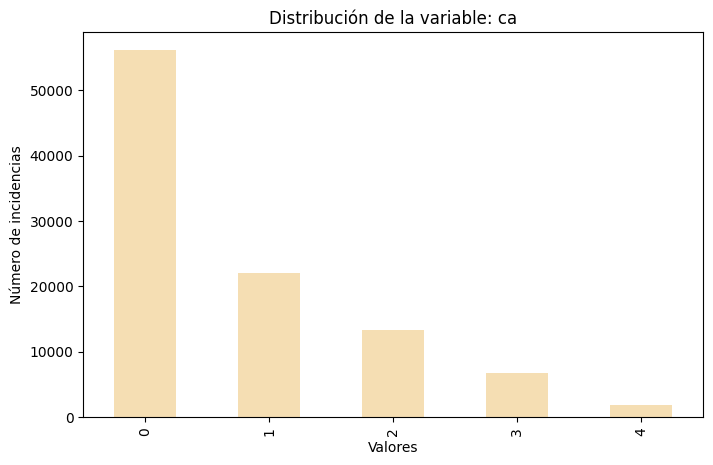

In [520]:
distributions_simulated = distributions_main_categories(categorical_columns, df_simulated)

## 4.3 Visualización de correlaciones entre variables DataSet Simulado.

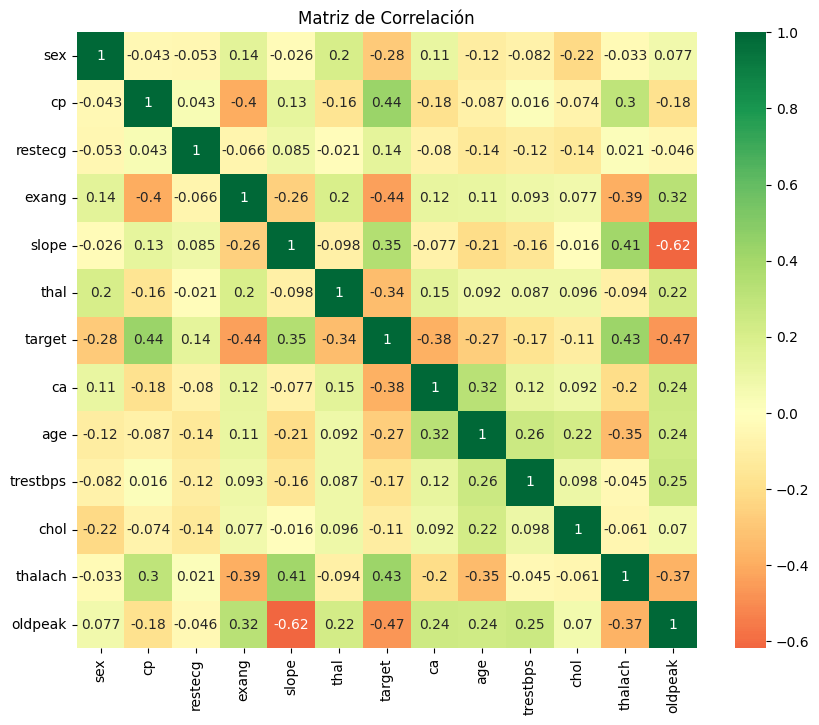

In [502]:
correlation_variables(df_simulated)

## 4.4 Diferencias en la distribucion de datos

In [521]:
distributions_simulated

{'sex': [{'valor': 1, 'incidencias': 69665, 'porcentaje': 69.66},
  {'valor': 0, 'incidencias': 30335, 'porcentaje': 30.34}],
 'cp': [{'valor': 0, 'incidencias': 48750, 'porcentaje': 48.75},
  {'valor': 2, 'incidencias': 27437, 'porcentaje': 27.44},
  {'valor': 1, 'incidencias': 16346, 'porcentaje': 16.35},
  {'valor': 3, 'incidencias': 7467, 'porcentaje': 7.47}],
 'restecg': [{'valor': 1, 'incidencias': 50070, 'porcentaje': 50.07},
  {'valor': 0, 'incidencias': 48488, 'porcentaje': 48.49},
  {'valor': 2, 'incidencias': 1442, 'porcentaje': 1.44}],
 'exang': [{'valor': 0, 'incidencias': 66261, 'porcentaje': 66.26},
  {'valor': 1, 'incidencias': 33739, 'porcentaje': 33.74}],
 'slope': [{'valor': 1, 'incidencias': 46932, 'porcentaje': 46.93},
  {'valor': 2, 'incidencias': 45892, 'porcentaje': 45.89},
  {'valor': 0, 'incidencias': 7176, 'porcentaje': 7.18}],
 'thal': [{'valor': 2, 'incidencias': 53127, 'porcentaje': 53.13},
  {'valor': 3, 'incidencias': 40050, 'porcentaje': 40.05},
  {'val

In [527]:
distributions_original

{'sex': [{'valor': 1, 'incidencias': 713, 'porcentaje': 69.56},
  {'valor': 0, 'incidencias': 312, 'porcentaje': 30.44}],
 'cp': [{'valor': 0, 'incidencias': 497, 'porcentaje': 48.49},
  {'valor': 2, 'incidencias': 284, 'porcentaje': 27.71},
  {'valor': 1, 'incidencias': 167, 'porcentaje': 16.29},
  {'valor': 3, 'incidencias': 77, 'porcentaje': 7.51}],
 'restecg': [{'valor': 1, 'incidencias': 513, 'porcentaje': 50.05},
  {'valor': 0, 'incidencias': 497, 'porcentaje': 48.49},
  {'valor': 2, 'incidencias': 15, 'porcentaje': 1.46}],
 'exang': [{'valor': 0, 'incidencias': 680, 'porcentaje': 66.34},
  {'valor': 1, 'incidencias': 345, 'porcentaje': 33.66}],
 'slope': [{'valor': 1, 'incidencias': 482, 'porcentaje': 47.02},
  {'valor': 2, 'incidencias': 469, 'porcentaje': 45.76},
  {'valor': 0, 'incidencias': 74, 'porcentaje': 7.22}],
 'thal': [{'valor': 2, 'incidencias': 544, 'porcentaje': 53.07},
  {'valor': 3, 'incidencias': 410, 'porcentaje': 40.0},
  {'valor': 1, 'incidencias': 64, 'porce

In [556]:
for colum in categorical_columns:
    print(f"\033[1mVariable: {colum}\033[0m")
    for i in range(len(distributions_original[colum])):
        #Calcular las diferencias en el numero de incidencias
        diferencia = abs(distributions_original[colum][i]["porcentaje"]-distributions_simulated[colum][i]["porcentaje"])
        print(f"valor: {distributions_original[colum][i]["valor"]} Diferencia Porcentual: {diferencia}")

Variable: sex
valor: 1 Diferencia Porcentual: 0.09999999999999432
valor: 0 Diferencia Porcentual: 0.10000000000000142
Variable: cp
valor: 0 Diferencia Porcentual: 0.259999999999998
valor: 2 Diferencia Porcentual: 0.2699999999999996
valor: 1 Diferencia Porcentual: 0.060000000000002274
valor: 3 Diferencia Porcentual: 0.040000000000000036
Variable: restecg
valor: 1 Diferencia Porcentual: 0.020000000000003126
valor: 0 Diferencia Porcentual: 0.0
valor: 2 Diferencia Porcentual: 0.020000000000000018
Variable: exang
valor: 0 Diferencia Porcentual: 0.0799999999999983
valor: 1 Diferencia Porcentual: 0.0800000000000054
Variable: slope
valor: 1 Diferencia Porcentual: 0.09000000000000341
valor: 2 Diferencia Porcentual: 0.13000000000000256
valor: 0 Diferencia Porcentual: 0.040000000000000036
Variable: thal
valor: 2 Diferencia Porcentual: 0.060000000000002274
valor: 3 Diferencia Porcentual: 0.04999999999999716
valor: 1 Diferencia Porcentual: 0.10000000000000053
valor: 0 Diferencia Porcentual: 0.0
Var

## 4.5 Diferencias en las estadisticas descriptivas

In [560]:
columnasDescribe = ["mean", "std", "min", "25%", "50%", "75%", "max"]
for colum in numeric_columns:
    print(f"\033[1mDiferencias en la variable: {colum}\033[0m ")
    for C_describe in columnasDescribe: 
        print(f"Diferencia en {C_describe}: {abs(describe_expandido[colum][C_describe].item()-describe_original[colum][C_describe].item())} ")
    

Diferencias en la variable: age 
Diferencia en mean: 0.16532412074254665 
Diferencia en std: 0.7785721391573617 
Diferencia en min: 0.02967889707846183 
Diferencia en 25%: 0.0 
Diferencia en 50%: 0.9214511557832452 
Diferencia en 75%: 1.0 
Diferencia en max: 0.0 
Diferencias en la variable: trestbps 
Diferencia en mean: 0.36285259644375856 
Diferencia en std: 1.6249774357015152 
Diferencia en min: 0.0 
Diferencia en 25%: 0.0 
Diferencia en 50%: 0.10987282805871246 
Diferencia en 75%: 0.0 
Diferencia en max: 0.0 
Diferencias en la variable: chol 
Diferencia en mean: 0.16055038733932747 
Diferencia en std: 6.357454159283087 
Diferencia en min: 0.10382093105961587 
Diferencia en 25%: 2.951924234522977 
Diferencia en 50%: 0.7330042504914331 
Diferencia en 75%: 2.0 
Diferencia en max: 0.0 
Diferencias en la variable: thalach 
Diferencia en mean: 0.5317450307879881 
Diferencia en std: 1.0989594286573592 
Diferencia en min: 0.0 
Diferencia en 25%: 0.0 
Diferencia en 50%: 0.0 
Diferencia en 75

## 4.6 La influencia de la simulación en la calidad y confiabilidad del dataset.

In [563]:
(constantes/500000)*100

45.8036

El DataSet fue reproducido con exito, sin embargo la calidad y confiabilidad del mismo es muy poca: 
- De los **500,000 datos generados** entre las 5 columnas numericas para un total de 100,000 filas, **45.8036% fue generado de manera constante.** Lo que se visualiza mejor en aquellos valores donde la desviacion estandar es cero.
- Las **correlaciones entre variables** no muestran un patrón lógico o esperado; por el contrario, presentan **contradicciones con respecto a las relaciones previstas**, lo que sugiere una estructura artificial.